
 ANALYSIS FOR REAL ESTATE PRICES

 DATA CLEANING

 Null Values
price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

 BOX PLOT


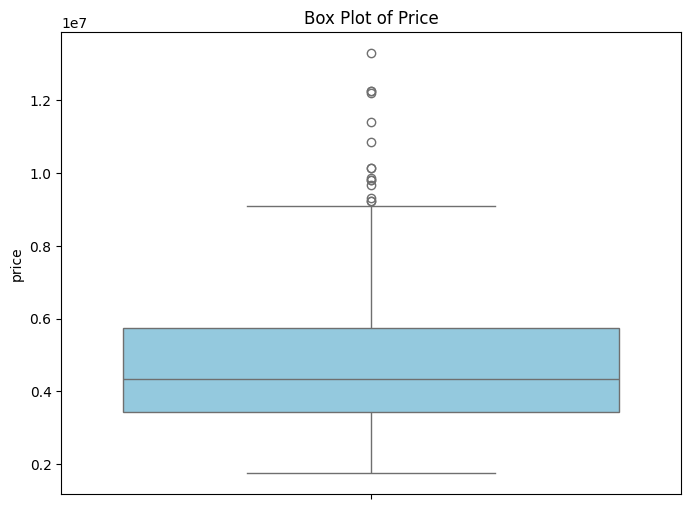

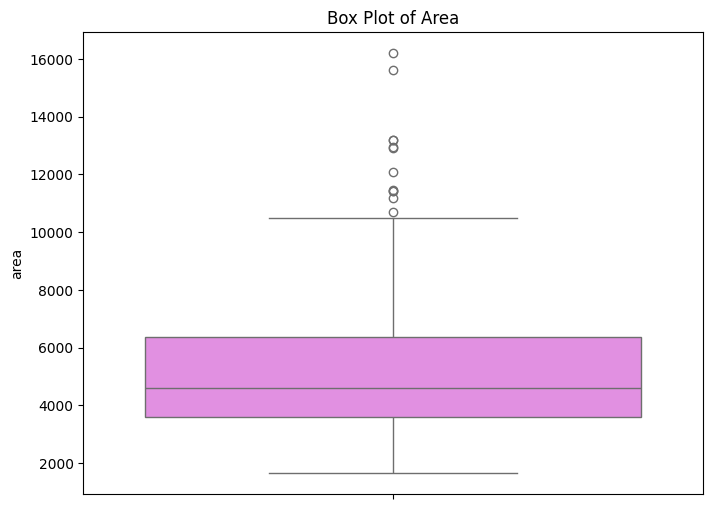

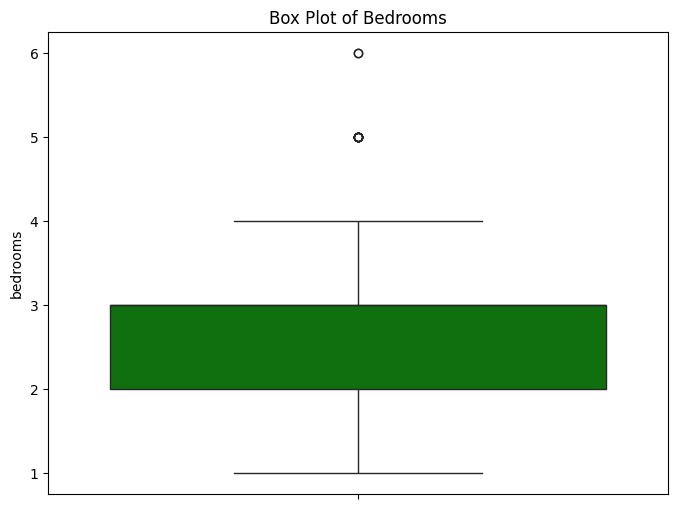

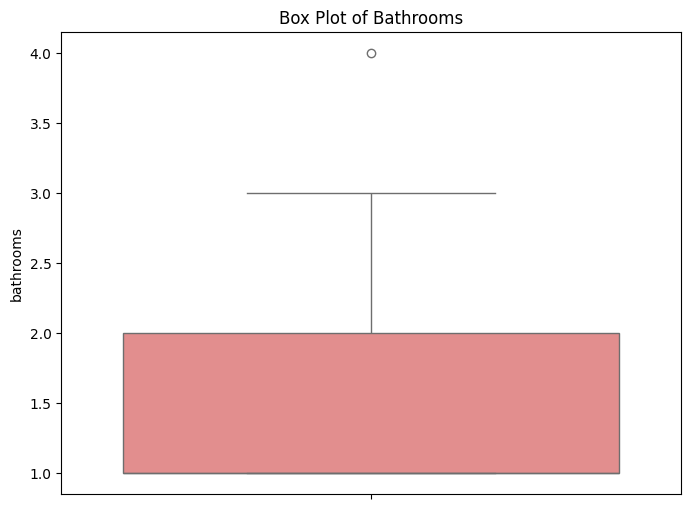


 DATA CLEANING AFTER REMOVING OUTLIERS


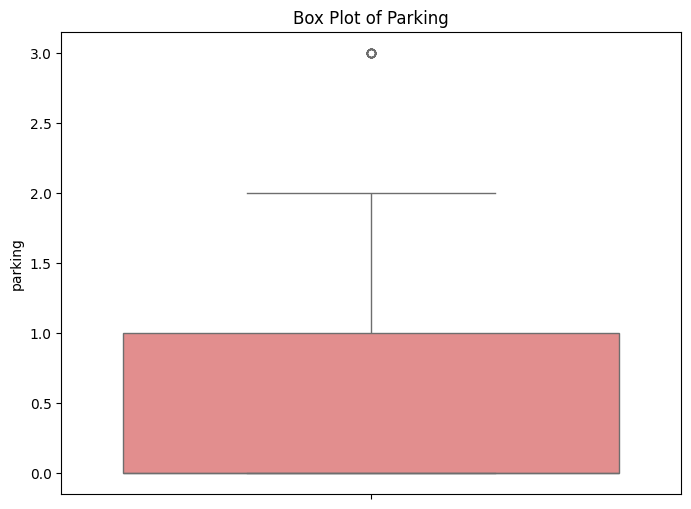

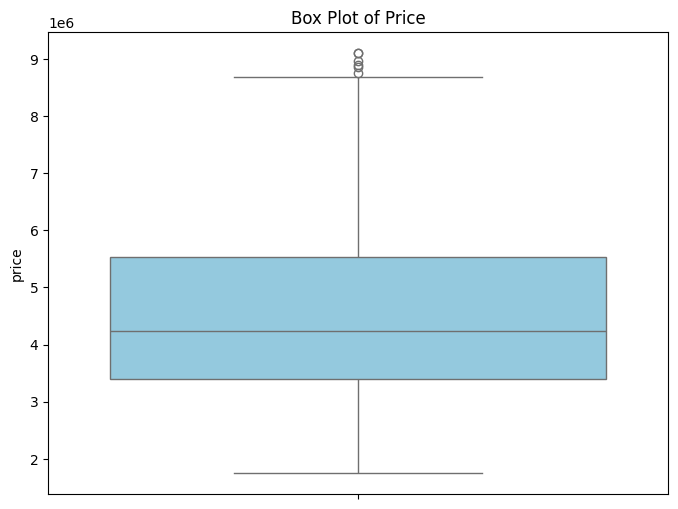

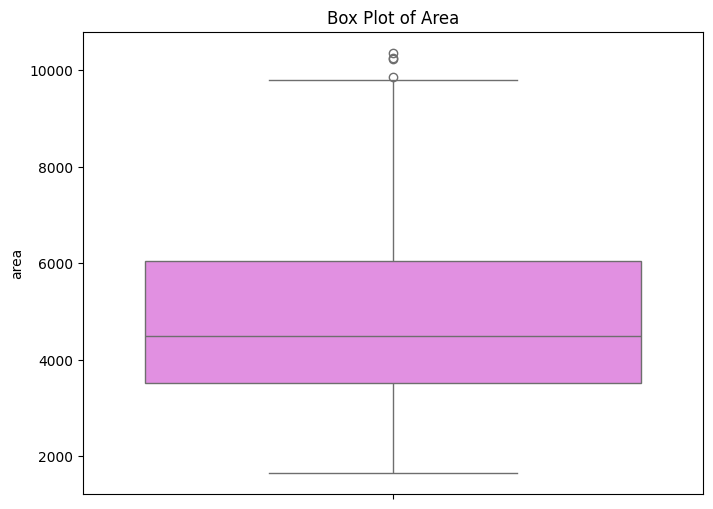

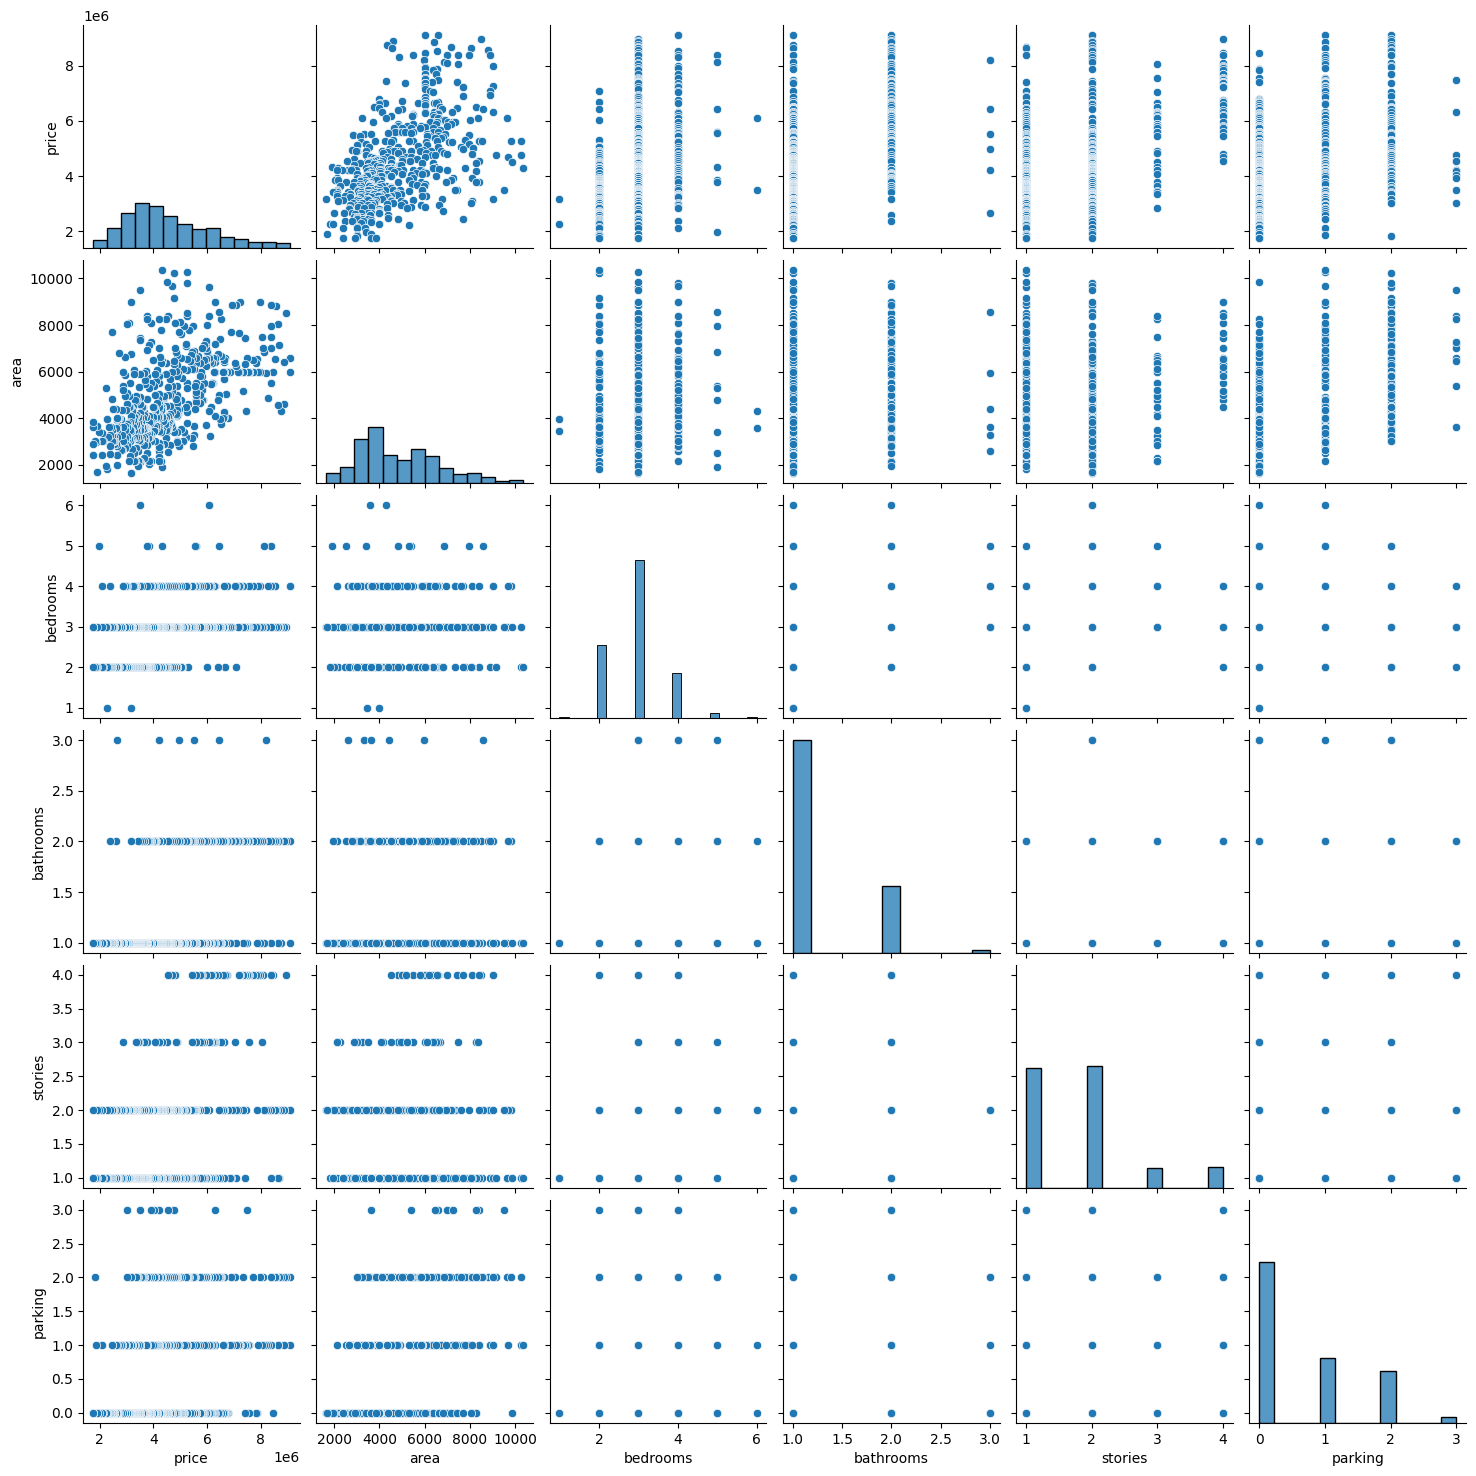


 DATA CLEANING AFTER CLASSIFICATION


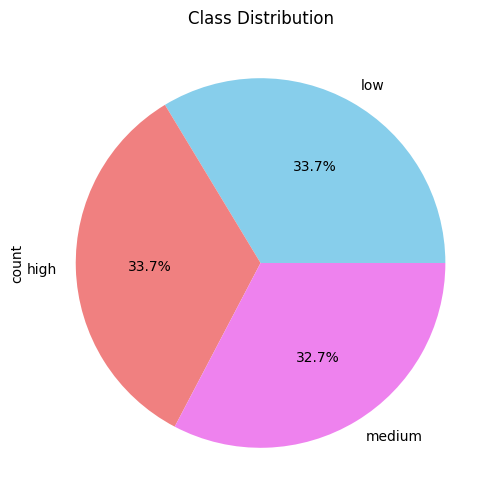

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
15  9100000  6000         4          1        2      yes        no      yes   
16  9100000  6600         4          2        2      yes       yes      yes   
17  8960000  8500         3          2        4      yes        no       no   
18  8890000  4600         3          2        2      yes       yes       no   
19  8855000  6420         3          2        2      yes        no       no   
20  8750000  4320         3          1        2      yes        no      yes   
21  8680000  7155         3          2        1      yes       yes      yes   
22  8645000  8050         3          1        1      yes       yes      yes   
23  8645000  4560         3          2        2      yes       yes      yes   
24  8575000  8800         3          2        2      yes        no       no   

   hotwaterheating airconditioning  parking prefarea furnishingstatus class  
15              no              no        2       no

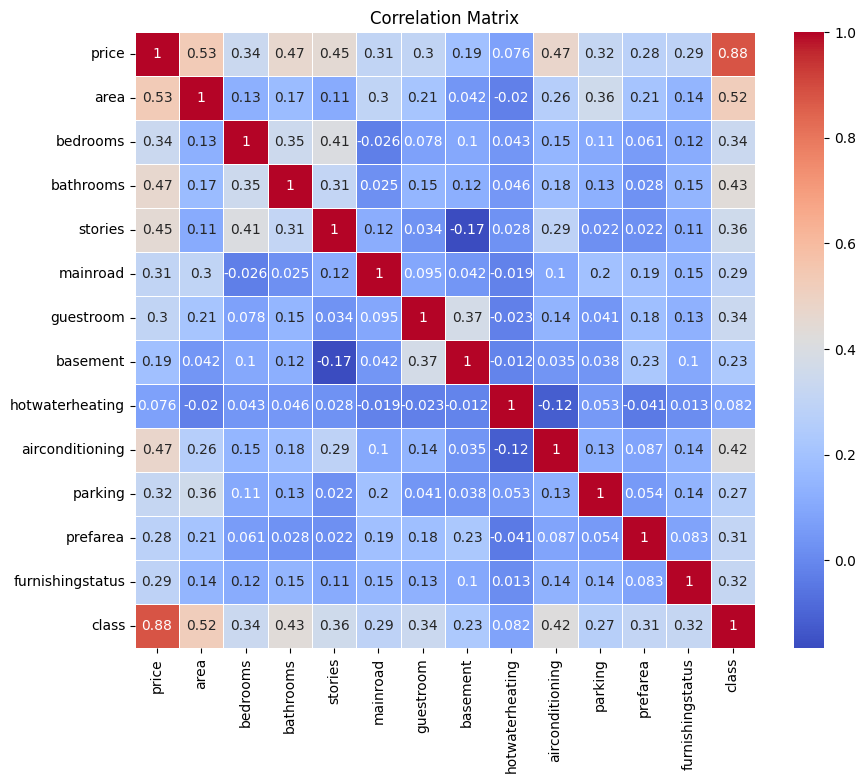


 Training Data Size:  (361, 2)

 Testing Data Size:  (156, 2)

 RANDOM FOREST PERFORMANCE EVALUATIONS


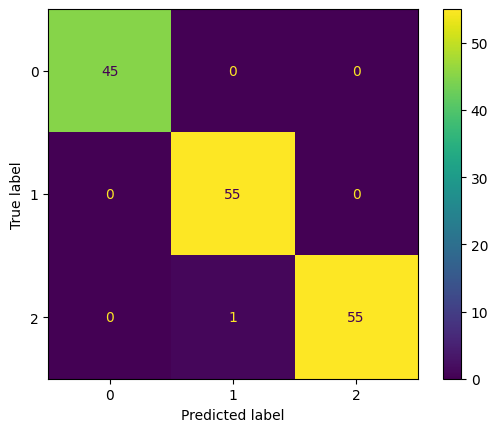

Accuracy Score =  0.9935897435897436
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        55
           2       1.00      0.98      0.99        56

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



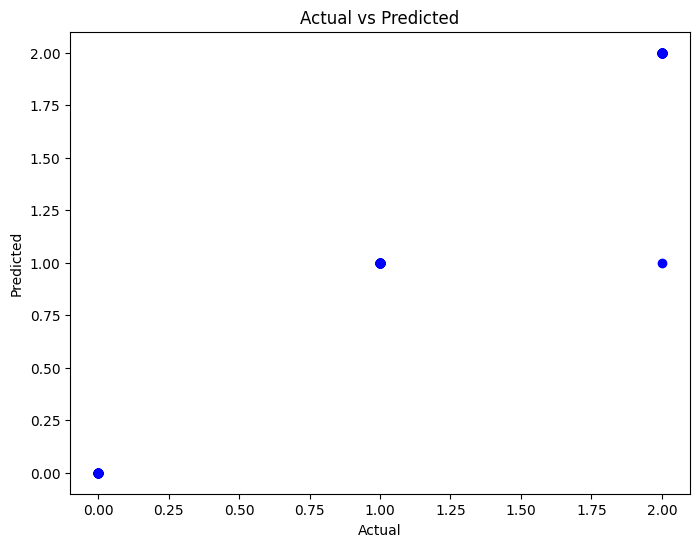

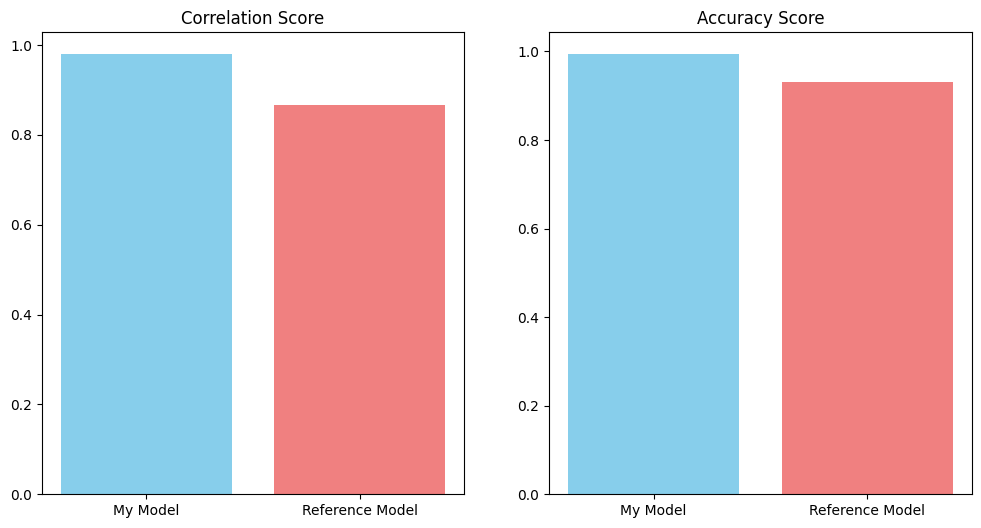

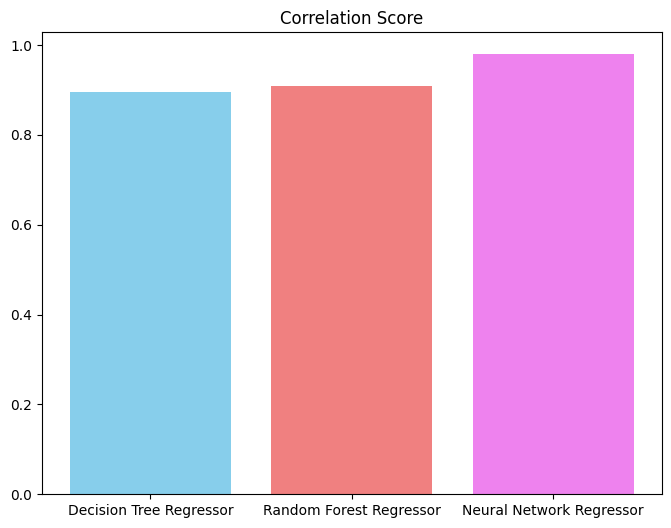

Text(0.5, 1.0, 'Accuracy Score')

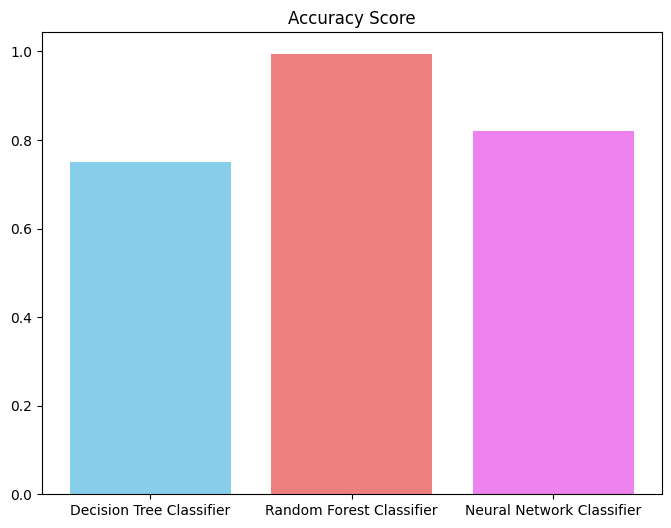

In [2]:
"""
Created Feb 23, 2024
@author: Gideon Assafuah
Decision Tree to predict real estate tax class at present
"""

# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Instantiate the label encoder
label_encoder = LabelEncoder()

# --------------------------class model--------------------------------------------------------

class RandomForestClassifierModel:
    
    def load_data(self, filepath):
        # Load the data from the file
        df = pd.read_csv(filepath)
        self.df = df
        # Print the first 10 rows of the dataframe
        # print(df.head(10))
        # Print the shape of the dataframe
        # print(df.shape)

    def clean_data(self):

        # new columns are  price	area	bedrooms	bathrooms	stories	mainroad	guestroom	basement	hotwaterheating	airconditioning	parking	prefarea	furnishingstatus
        #Clean the data
        df = self.df

        print("\n DATA CLEANING")

        # checking for null values
        print("\n Null Values")
        print(df.isnull().sum()*100/df.shape[0])

        # we get no null values

        # plot a boxplot of numerical columns
        print("\n BOX PLOT")

        # box plot fo price
        plt.figure(figsize=(8, 6))
        sns.boxplot(df['price'], color='skyblue')
        plt.title('Box Plot of Price')
        plt.show()

        # box plot of area
        plt.figure(figsize=(8, 6))
        sns.boxplot(df['area'], color='violet')
        plt.title('Box Plot of Area')
        plt.show()

        # box plot of bedrooms
        plt.figure(figsize=(8, 6))
        sns.boxplot(df['bedrooms'], color='green')
        plt.title('Box Plot of Bedrooms')
        plt.show()

        # box plot of bathrooms
        plt.figure(figsize=(8, 6))
        sns.boxplot(df['bathrooms'], color='lightcoral')
        plt.title('Box Plot of Bathrooms')
        plt.show()

        # box plot of parking
        plt.figure(figsize=(8, 6))
        sns.boxplot(df['parking'], color='lightcoral')
        plt.title('Box Plot of Parking')

        # from the box plot, we can see that there are outliers in the price and area columns
        # we will remove the outliers

        # remove outliers from the price column
        Q1 = df.price.quantile(0.25)
        Q3 = df.price.quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

        # remove outliers from the area column
        Q1 = df.area.quantile(0.25)
        Q3 = df.area.quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

        print("\n DATA CLEANING AFTER REMOVING OUTLIERS")

        # plot the box plot of the price column after removing outliers
        plt.figure(figsize=(8, 6))
        sns.boxplot(df['price'], color='skyblue')
        plt.title('Box Plot of Price')
        plt.show()

        # plot the box plot of the area column after removing outliers
        plt.figure(figsize=(8, 6))
        sns.boxplot(df['area'], color='violet')
        plt.title('Box Plot of Area')
        plt.show()


        sns.pairplot(df)
        plt.show()

        #  classify price features into low, medium and  high. If the price of the house is less than 1,00,000, then the price of the house is considered ”low”.
        # If the price of the house is between 1,00,000 and 3,75,000, then the price of the house is considered ”medium”.
        # If the price of the house is greater than 3,75,000, then the price of the house is considered ”high.”
        #  then the price of the house is considered ”high.”
        # df['class'] = df['price'].apply(lambda x: 'low' if x <= 3750000 else 'high')

        # low properties are those below the 33rd percentile
        # medium properties are those between the 33rd and 66th percentile
        # high properties are those above the 66th percentile

        df['class'] = pd.qcut(df['price'], q=[0, 0.33, 0.66, 1], labels=['low', 'medium', 'high'])

        print("\n DATA CLEANING AFTER CLASSIFICATION")

        # plot the class column using a pie chart
        plt.figure(figsize=(8, 6))
        df['class'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'violet'])
        plt.title('Class Distribution')
        plt.show()
        
    

        print(df.head(10))

        self.df = df




    def preprocess_data(self):
        #Preprocess the data
        
        df = self.df
        
        print('\n DATA ENCODING')   

        # List of variables to map

        varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

        # Defining the map function
        def binary_map(x):
            return x.map({'yes': 1, "no": 0})

        def binary_map_class(x):
            return x.map({'low': 0, "medium": 1, "high": 2})
        
        def binary_map_furnishing(x):
            return x.map({'furnished': 2, "semi-furnished": 1, "unfurnished": 0})

        # Applying the function to the housing list
        df[varlist] = df[varlist].apply(binary_map)  

        # Applying the function to the class list
        df['class'] = df[['class']].apply(binary_map_class)


        # Applying the function to the furnishingstatus list
        df['furnishingstatus'] = df[['furnishingstatus']].apply(binary_map_furnishing)
        

        # correlation matrix
        print("\n CORRELATION MATRIX")
        plt.figure(figsize=(10, 8))
        sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title('Correlation Matrix')
        plt.show()

        features = df.drop([
            'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'
        ], axis=1)
        label = df['class']
        # Split the data into training and testing set
        X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)
        print("\n Training Data Size: ", X_train.shape)
        print("\n Testing Data Size: ", X_test.shape)
        self.df = df
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def train_RF_predict_test(self):
        X_train = self.X_train
        y_train = self.y_train
        X_test = self.X_test
        RFclass = RandomForestClassifier(n_estimators=2, bootstrap=True, criterion='entropy', random_state=0, n_jobs=-1)
        RFclass.fit(X_train, y_train)
        self.pred_y = RFclass.predict(X_test)
        self.RFclass = RFclass

    def evaluate_RFmodel(self):
        print('\n RANDOM FOREST PERFORMANCE EVALUATIONS')
        RFclass = self.RFclass
        cm = confusion_matrix(self.y_test, self.pred_y, labels=RFclass.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RFclass.classes_)
        disp.plot()
        plt.show()
        print("Accuracy Score = ", accuracy_score(self.y_test, self.pred_y))
        print(classification_report(self.y_test, self.pred_y))

        # plot predicted vs actual line
        plt.figure(figsize=(8, 6))
        plt.scatter(self.y_test, self.pred_y, color='blue')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title('Actual vs Predicted')
        plt.show()

    def predict_new_instance(self, new_instance):
        pred_instance_type = self.DTClass.predict(new_instance)
        new_prediction = label_encoder.inverse_transform(pred_instance_type)
        print('\n TAX CLASS AT PRESENT = ', new_prediction)

# --------------------------class driver--------------------------------------------------------

# Analysis for real estate prices
print("\n ANALYSIS FOR REAL ESTATE PRICES")
handle = RandomForestClassifierModel()
filepath = "house_prices.csv"
handle.load_data(filepath)
handle.clean_data()
# handle.visualize_data()
handle.preprocess_data()
handle.train_RF_predict_test()
handle.evaluate_RFmodel()

# Deployment of the model for dataset 1
# new data
# new_data = [[borough, neighborhood, building_class_category, block, lot, building_class_present, zip_code,
#              residential_units, commercial_units, total_units, land_square_feet, gross_square_feet, year_built,
#              tax_class_at_time_of_sale, building_class_at_time_of_sale, sale_price]]
# handle.predict_new_instance(new_data)

# my model vs reference model

# Bangalore House Price Prediction
# my best model neural network regressor 
# correlation score of 0.979552

# reference model best model leinear regression
# correlation score of 0.866316

# house prices classification prediction
# my best model random forest classifier
# accuracy score of 0.9935

# reference model best model random forest classifier
# accuracy score of 0.93

# plot a graph of my model vs reference model

model = ['My Model', 'Reference Model']

correlation_score = [0.979552, 0.866316]

accuracy_score = [0.9935, 0.93]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].bar(model, correlation_score, color=['skyblue', 'lightcoral'])

ax[0].set_title('Correlation Score')

ax[1].bar(model, accuracy_score, color=['skyblue', 'lightcoral'])

ax[1].set_title('Accuracy Score')

plt.show()


# plot a bar chart with models and Correlation score

# decision tree Regressor - 0.894548

# random forest Regressor - 0.909615

# neural network Regressor - 0.979552

# plot
model = ['Decision Tree Regressor', 'Random Forest Regressor', 'Neural Network Regressor']

correlation_score = [0.894548, 0.909615, 0.979552]

plt.figure(figsize=(8, 6))
plt.bar(model, correlation_score, color=['skyblue', 'lightcoral', 'violet'])

plt.title('Correlation Score')
plt.show()


# plot a bar chart with models and accuracy score

# decision tree classifier - 0.75

# random forest classifier - 0.9935

# neural network classifier - 0.8205

# plot

model = ['Decision Tree Classifier', 'Random Forest Classifier', 'Neural Network Classifier']

accuracy_score = [0.75, 0.9935, 0.8205]

plt.figure(figsize=(8, 6))

plt.bar(model, accuracy_score, color=['skyblue', 'lightcoral', 'violet'])

plt.title('Accuracy Score')

